In [1]:
import re

In [2]:

import os
master_array = [] #append results to array to create data frame
folder = './transcripts and metadata/Friends/'

for filename in os.listdir(folder):
  if filename.endswith('.txt'):
    pattern = re.compile(r'(?<=\d)\s')
    name = filename.strip('.txt')#obtain the season and episodes
    split_name = re.split(pattern, name)
    seasonep = split_name[0]
    if '-' in seasonep:
      pattern = re.compile(r'-')
      split_seasons = re.split(pattern, seasonep)
      x = split_seasons[0]
      y = split_seasons[1]
      pattern = re.compile(r'E')
      x_split = re.split(pattern, x)
      y_split = re.split(pattern, y)
      season = x_split[0]
      episode = (int(x_split[1]) + int(y_split[1]))/2
      episode_name = split_name[1]
    else:
      pattern = re.compile(r'E')
      split_season = re.split(pattern, seasonep)   
      season = split_season[0]
      # print(season)
      episode = split_season[1]
      episode_name = split_name[1]

    with open(folder + filename, 'r', encoding='UTF-8') as f:
      lines = f.readlines() #read the script file
      pattern = re.compile(r'\w+:\s') # store the regex
      for line in lines:
        result = re.match(pattern, line)
        if result is not None: # split the script where our pattern matched (pink dot)
          split_line = line.split(':')
          character = split_line[0]
          speech = split_line[1].strip()
          line= [seasonep, season, episode, episode_name, character, speech]
          master_array.append(line)
        else:
          pass


In [3]:
import pandas as pd

friends = pd.DataFrame(master_array, columns=['id', 'season', 'episode', 'episode_name', 'character', 'line'])

In [4]:
friends.sample(20)

,id,season,episode,episode_name,character,line
6580,S02E05,S02,05,Five Steaks And An Eggplan,MONICA,"Yeah, we switched meat suppliers at work, and ..."
11025,S03E01,S03,01,The Princess Leia Fantasy,Janice,"Oh, I wish. Look, honey, you have that report ..."
42491,S08E05,S08,05,Rachels Date,Rachel,What?!
21781,S04E19,S04,19,All The Haste,Emily,What?!
7605,S02E10,S02,10,Russ,FBOB,See ya. [exits]
37497,S07E10,S07,10,The Huliday Armadillo,Joey,What is Rock 'n' Roll about that?
8808,S02E15,S02,15,Ross And Rachel... You Know,ROSS,No.
53310,S09E24,S09,24,In Barbados part II,Charlie,(walking in) Hey! There you are!
58020,S10E16,S10,16,Rachels Going Away Party,Chandler,"Honey, it's gonna be okay."
45850,S08E19,S08,19,Joeys Interview,Rachel,So did they call you to tell you your name’s g...


In [5]:
# Ensure all names are refering to the correct person
print(sorted(friends['character'].unique()))
friends['character'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                    'JOEY':'Joey',
                    'MNCA':'Monica','MONICA':'Monica', 'MOnica':'Monica',
                    'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                    'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                    'ROSS':'Ross'},inplace=True)

['ALISON', 'ALL', 'AMBER', 'AMGER', 'Actor', 'Adrienne', 'Alan', 'Alex', 'Alice', 'All', 'Allesandro', 'Amanda', 'Amy', 'Anchorwoman', 'Andrea', 'Angela', 'Annabelle', 'Announcer', 'Arthur', 'Ashley', 'Assistant', 'Attendant', 'Aurora', 'BARRY', 'BEN', 'BILL', 'BOTH', 'BOYS', 'Ballerina', 'Bandleader', 'Barry', 'Ben', 'Benjamin', 'Bernice', 'Bill', 'Billy', 'Bitsy', 'Bob', 'Bobby', 'Bonnie', 'Boss', 'Both', 'Boy', 'Brenda', 'Burt', 'CAROL', 'CAROLINE', 'CHAN', 'CHANDLER', 'Cailin', 'Caitlin', 'Carl', 'Carol', 'Casey', 'Cashier', 'Cassie', 'Catherine', 'Cecilia', 'Celia', 'Chandler', 'Chandlers', 'Charlie', 'Cheryl', 'Chip', 'Chloe', 'Claudia', 'Clerk', 'Cliff', 'Clown', 'Colleen', 'Commercial', 'Conan', 'Cookie', 'Cop', 'Courtney', 'Cowgirl', 'Croupler', 'Customer', 'Customers', 'Cynthia', 'DIRECTOR', 'DOCTOR', 'DUNCAN', 'Dan', 'Dana', 'Danielle', 'Danny', 'Dave', 'David', 'Devon', 'Dina', 'Director', 'Dirk', 'Doctor', 'Don', 'Donny', 'Doug', 'Drew', 'EDDIE', 'ERICA', 'ERNIE', 'ESTELLE

In [6]:
friends['character'].value_counts()[:6]

Rachel      9285
Ross        9098
Chandler    8461
Monica      8387
Joey        8215
Phoebe      7473
Name: character, dtype: int64

<BarContainer object of 6 artists>

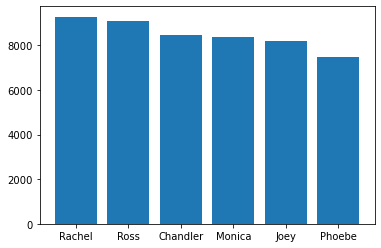

In [7]:
import matplotlib.pyplot as plt

x = ['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe']
y = [i for i in friends['character'].value_counts().tolist()[:6]]


plt.bar(x,y)

In [8]:
def remove_stagedir(txt):
    ret = ''
    skip1c = 0
    skip2c = 0
    for i in txt:
        if i == '[':
            skip1c += 1
        elif i == '(':
            skip2c += 1
        elif i == ']' and skip1c > 0:
            skip1c -= 1
        elif i == ')'and skip2c > 0:
            skip2c -= 1
        elif skip1c == 0 and skip2c == 0:
            ret += i
    return ret
    
friends['line'] = friends.line.apply(remove_stagedir)

friends.sample(20)


,id,season,episode,episode_name,character,line
27723,S05E20,S05,20,The Ride Along,Joey,"That's what this is about! Oh my God, you hate..."
23713,S05E03,S05,03,Hundredth,Phoebe,"But umm, I mean, did you talk to them about, y..."
4621,S01E20,S01,20,The Evil Orthodontis,Joey,"I tried to call you from the coffee shop, and ..."
50679,S09E14,S09,14,The Blind Dates,Monica,What are you doing?
14823,S03E16,S03,16,The Morning After,Ross,Rachel?
29002,S06E01,S06,01,Vegas,Monica,"So, what do you think we should do?"
22111,S04E20,S04,20,The Wedding Dresses,Rachel,"Okay, you guys, just relax. I doooo."
16913,S03E24,S03,24,The Ultimate Fighting Champion,Pete,Uh-oh.
23252,S05E01,S05,01,Ross Says Rachel,Rachel,"Oh, okay, we’re going. Yeah."
12698,S03E08,S03,08,The Giant Poking Device,Phoebe,"Yes, while I was in the chair! That’s why I ta..."


In [9]:
friends['season'] = friends['season'].apply(lambda x : re.sub(r'S0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : re.sub(r's0*', '', str(x)))
friends['season'] = friends['season'].apply(lambda x : int(x))
friends['episode'] = friends['episode'].apply(lambda x : int(x))
friends.head()

,id,season,episode,episode_name,character,line
0,S01E01,1,1,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...
1,S01E01,1,1,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ..."
2,S01E01,1,1,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu..."
3,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?"
4,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w..."


In [10]:
print(friends.id.unique())
# there should be ten seasons
print(friends.season.unique())
# all numbers from 1 to 25 should be present
friends.episode.unique()

['S01E01' 'S01E02' 'S01E03' 'S01E04' 'S01E05' 'S01E06' 'S01E07' 'S01E08'
 'S01E09' 'S01E10' 'S01E11' 'S01E12' 'S01E13' 'S01E14' 'S01E15' 'S01E16'
 'S01E17' 'S01E18' 'S01E19' 'S01E20' 'S01E21' 'S01E22' 'S01E23' 'S01E24'
 'S02E01' 'S02E02' 'S02E03' 'S02E04' 'S02E05' 'S02E06' 'S02E07' 'S02E08'
 'S02E09' 'S02E10' 'S02E11' 'S02E12' 'S02E13' 'S02E14' 'S02E15' 'S02E16'
 'S02E17' 'S02E18' 'S02E19' 'S02E20' 'S02E21' 'S02E22' 'S02E23' 'S02E24'
 'S03E01' 'S03E02' 'S03E03' 'S03E04' 'S03E05' 'S03E06' 'S03E07' 'S03E08'
 'S03E09' 'S03E10' 'S03E11' 'S03E12' 'S03E13' 'S03E14' 'S03E15' 'S03E16'
 'S03E17' 'S03E18' 'S03E19' 'S03E20' 'S03E21' 'S03E22' 'S03E23' 'S03E24'
 's03E25' 'S04E01' 'S04E02' 'S04E03' 'S04E04' 'S04E05' 'S04E06' 'S04E07'
 'S04E08' 'S04E09' 'S04E10' 'S04E11' 'S04E12' 'S04E13' 'S04E14' 'S04E15'
 'S04E16' 'S04E17' 'S04E18' 'S04E19' 'S04E20' 'S04E21' 'S04E22' 'S04E23'
 'S04E24' 'S05E01' 'S05E02' 'S05E03' 'S05E04' 'S05E05' 'S05E06' 'S05E07'
 'S05E08' 'S05E09' 'S05E10' 'S05E11' 'S05E12' 'S05E

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [11]:
friends['len'] = [len(value.split()) if type(value) == str else 0 for value in friends.line.values]
friends.head()
friends['len'].sum()

592490

<function matplotlib.pyplot.show(close=None, block=None)>

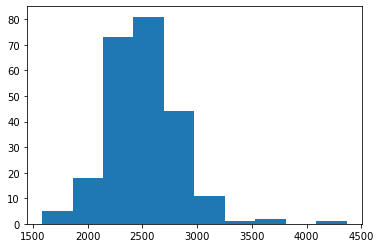

In [12]:
groups = friends.groupby('id')

eplen = [groups.get_group(group)['len'].sum() for group in groups.groups]
import matplotlib.pyplot as plt

plt.hist(eplen)
plt.show

### preprocessing friends

In [13]:
import os
import json
import glob
import shutil

# limit to only three tags in Universal Part-of-Speech tagset
allowed = set('ADJ NOUN VERB'.split())

In [14]:
# !python -m spacy validate
# !python -m spacy download nl_core_news_sm
# !python -m spacy download en_core_web_sm

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def prep(txt):
    toklst = []
    tokens = nlp(txt)
    if tokens:
        for t in tokens:
            if t.pos_ in allowed and t.is_alpha and not t.is_stop:
                toklst.append(t.text)
    return ' '.join(toklst).casefold()
                

c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\Gebruiker\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [16]:
friends['prepped'] = friends.line.apply(prep)

KeyboardInterrupt: 

In [ ]:
friends.head()

,id,season,episode,episode_name,character,line,len,prepped
0,S01E01,1,1,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...,11,tell guy work
1,S01E01,1,1,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ...",14,going guy got wrong
2,S01E01,1,1,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu...",16,nice hump hump hairpiece
3,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?",5,wait eat chalk
4,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w...",16,want went


In [ ]:
friends['len_prep'] = [len(value.split()) if type(value) == str else 0 for value in friends.prepped.values]
friends.head()
friends['len_prep'].sum()

161950

In [ ]:
import numpy as np
#calculate average episode length
friends_red = friends[friends['id'].str.isalnum() == True]
# print(friends_red['id'].unique())

grouped = friends_red.groupby('id')
print(np.mean(grouped['len_prep'].agg(sum)))

686.228813559322


In [ ]:
friends.to_csv('transcripts and metadata/friends_per_line.csv', sep='\t')

### ratings

In [ ]:
import pandas as pd
friends = pd.read_csv('transcripts and metadata/friends_per_line.csv', sep='\t', index_col=0)
ratings = pd.read_csv('transcripts and metadata//Friends/friends_episodes_v3.csv')
ratings.head()
friends.head()

,id,season,episode,episode_name,character,line,len,prepped,len_prep
0,S01E01,1,1,Monica Gets A Roommate,Monica,There's nothing to tell! He's just some guy I ...,11,tell guy work,3
1,S01E01,1,1,Monica Gets A Roommate,Joey,"C'mon, you're going out with the guy! There's ...",14,going guy got wrong,4
2,S01E01,1,1,Monica Gets A Roommate,Chandler,"All right Joey, be nice. So does he have a hu...",16,nice hump hump hairpiece,4
3,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Wait, does he eat chalk?",5,wait eat chalk,3
4,S01E01,1,1,Monica Gets A Roommate,Phoebe,"Just, 'cause, I don't want her to go through w...",16,want went,2


In [ ]:
ratings.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [ ]:
#cell was used to check for double episodes
friends_red = friends[friends['id'].str.isalnum() == True]
double_episodes = friends[friends['id'].str.isalnum() == False]
print(len(friends.groupby('id')))
print(len(friends_red.groupby('id')))
print(len(double_episodes.groupby('id')))
# len(ratings)

236
236
0


In [ ]:
# friends.id.unique()

In [ ]:
def match(df):
    season = int(df[1])
    ep = int(df[2])
    df['match'] = str(season) + str(ep)
    return df

friends = friends.apply(match, axis=1)
ratings = ratings.apply(match, axis=1)
print(friends['match'][0])
print(ratings['match'][0])

11
11


## get text

In [ ]:
from numpy import NaN

friends.sort_index(inplace=True)
ratings.sort_index(inplace=True)

groups = friends.groupby('id')

#make empty columns for episode information
ratings["text"] = NaN
ratings["len in words"] = NaN
ratings["len_prep"] = NaN

for group in groups.groups:
    ep = groups.get_group(group)
    ep.reset_index(drop=True, inplace=True)
    matcher = ep['match'][0]
    # print(matcher)

    #get text for the entire episode, ignoring the cells that are now empty after preprocessing
    tekst = ep['prepped'].dropna()
    text = ' '.join(tekst)
    text = ' '.join(text.split())
    # print(text[:10])

    #also the lenght
    lenght = ep['len'].sum()
    lenght_prep = ep['len_prep'].sum()

    #fill new columns with the info
    index = ratings[ratings['match'] == matcher].index
    # print(index)
    ratings.iloc[index, 10] = text
    ratings.iloc[index, 11] = lenght
    ratings.iloc[index, 12] = lenght_prep

In [ ]:
ratings.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,text,len in words,len_prep
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,tell guy work going guy got wrong nice hump hu...,3167.0,905.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,guys understand kissing important need know ki...,2030.0,531.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,hi guys good walked subway said ouch said good...,2326.0,631.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,omnipotent day want world peace hunger good th...,2298.0,695.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,let big deal big deal amazing reach little man...,2444.0,655.0


<AxesSubplot:ylabel='Frequency'>

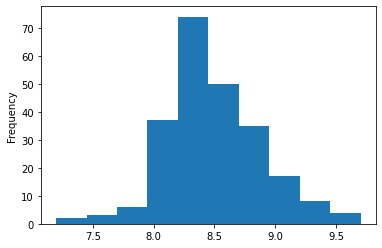

In [ ]:
ratings['Stars'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

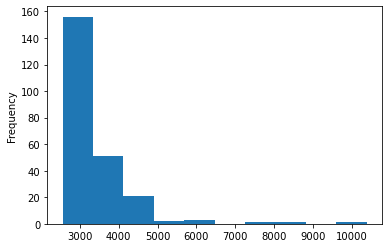

In [ ]:
ratings['Votes'].plot(kind='hist')

### character centrality per episode

In [ ]:
groups = friends.groupby('id')

occurrences = []

for epi in groups.groups:
    ep = groups.get_group(epi)
    occ = ep.character.values
    occurrences.append(occ)

In [ ]:
# print(occurrences[0])

In [72]:
from itertools import combinations
import networkx as nx


lst = []

for occ in occurrences:
    dct = {}
    G = nx.Graph()
    si, ei = 0, 2
    while ei < len(occ):
        interaction = []
        for character in set(occ[si : ei]):
            if ' ' in character:
                interaction.extend(character.split())
            else:
                interaction.append(character)
        interaction = set(interaction)
        if len(interaction) > 1:
            for sp1, sp2 in combinations(interaction, 2):
                if G.has_edge(sp1, sp2):
                    G[sp1][sp2]['weight'] += 1
                else:
                    G.add_edge(sp1, sp2, weight=1)
        si += 1
        ei += 1

    
    weighted = nx.pagerank(G)
    char = {c: weighted[c] for c in G.nodes}
    lst.append(char)

In [78]:
chardf = pd.DataFrame(lst)
print(len(chardf))
chardf.head()

chars = [col for col in chardf.columns if len(chardf[col].dropna()) >= 10]

236


In [79]:
print(chars)
ok = ['Monica', 'Joey', 'Chandler', 'Phoebe', 'Ross', 'Rachel', 'Carol', 'Susan', 'Janice', 'Mike', 'Gunther', 'Ben', 'Emily']

['Monica', 'Joey', 'Chandler', 'Phoebe', 'All', 'Ross', 'Rachel', 'Carol', 'Susan', 'Both', 'Janice', 'Woman', 'Nurse', 'Guy', 'Man', 'ALL', 'Mike', 'Gunther', 'Ben', 'Emily']


In [81]:
main = chardf[ok]
main = main.fillna(0)
ratings = ratings.join(main)

In [82]:
ratings

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,Phoebe,Ross,Rachel,Carol,Susan,Janice,Mike,Gunther,Ben,Emily
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.061248,0.144114,0.155643,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.061500,0.248342,0.165269,0.088068,0.044696,0.000000,0.000000,0.000000,0.0,0.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.145415,0.125624,0.102383,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.111161,0.151849,0.162042,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.095007,0.150061,0.141764,0.000000,0.000000,0.047483,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2004,10,14,The One with Princess Consuela,22,When Phoebe goes to get her name changed she r...,Gary Halvorson,8.6,2989,1014,...,0.126801,0.155808,0.140751,0.000000,0.000000,0.085182,0.000000,0.000000,0.0,0.0
232,2004,10,15,The One Where Estelle Dies,22,Ross tries to get Rachel to go back to Ralph L...,Gary Halvorson,8.5,2771,1015,...,0.111157,0.176421,0.153581,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
233,2004,10,16,The One with Rachel's Going Away Party,22,"The gang throws Rachel a goodbye party, during...",Gary Halvorson,8.9,3141,1016,...,0.127607,0.161948,0.103928,0.000000,0.000000,0.000000,0.027391,0.019383,0.0,0.0
234,2004,10,17,The Last One: Part 1,30,Erica gives birth to the baby that Monica and ...,Kevin Bright,9.5,6221,1017,...,0.178454,0.233251,0.120296,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [83]:
# import seaborn as sb

# fig = plt.figure(figsize=(15, 10))
# sb.set_style("darkgrid")
# for col in mainsix.columns:
#     mainsix[col].rolling(window=10, center=True).mean().plot(label=col)
# plt.xlabel('', fontsize=10)
# plt.ylabel('character', fontsize=10)
# plt.title(f'pageranks scores per episode')
# plt.tight_layout()
# plt.legend();

<AxesSubplot:>

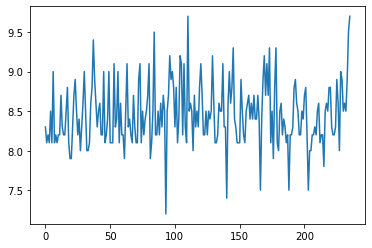

In [84]:
ratings['Stars'].plot()

In [85]:
stars = ratings['Stars']
t_average = stars.rolling(window=5).mean()

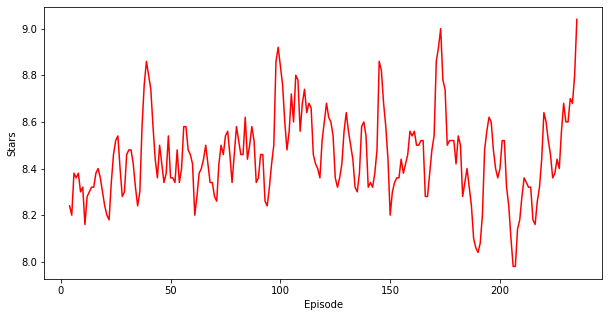

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(t_average, 'r-', label='Running average stars per 5 episodes')
plt.ylabel('Stars')
plt.xlabel('Episode')
plt.show()

<AxesSubplot:>

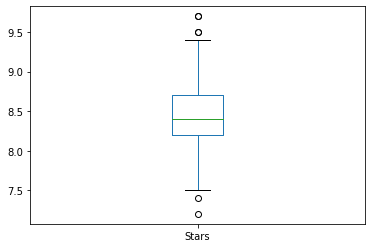

In [87]:
ratings['Stars'].plot(kind='box')

In [88]:
ratings.to_csv('transcripts and metadata/friends_mastersheet.csv')